In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
class Bat:
    def __init__(self, traits=None):
        if traits is None:
            # Initialize with default values and variability if no specific traits are provided
            self.traits = {
                'energy': 100,
                'metabolism': np.random.randint(4, 6),
                'hunger_threshold': np.random.randint(70, 90),
                'hunting_threshold': np.random.randint(5, 15),
                'aggression_threshold': np.random.randint(30, 50),
            }
        else:
            # If traits are provided, use them (for offspring)
            self.traits = traits
            
        self.energy = self.traits['energy']
        
        self.position = np.random.rand(2)  # Random initial position in 2D space

    def is_hungry(self):
        return self.energy < self.traits['hunger_threshold']

    def can_hunt(self):
        return self.energy >= self.traits['hunting_threshold']

    def is_aggressive(self):
        return self.traits['aggression_threshold'] <= self.energy < self.traits['hunting_threshold']

    def update_energy(self, amount):
        self.energy += amount
        self.energy = max(min(self.energy, 100), 0)  # Ensure energy stays within bounds

    def move_towards(self, target_position):
        if self.energy > self.traits['metabolism']:
            direction = target_position - self.position
            if np.linalg.norm(direction) != 0:
                direction = direction / np.linalg.norm(direction) * 0.1  # Normalize and scale movement
                self.position += direction
                self.update_energy(-self.traits['metabolism'])  # Consumes energy based on metabolism

    def move_randomly(self):
        self.position += (np.random.rand(2) - 0.5) * 0.1  # Small random movement
        self.update_energy(-self.traits['metabolism'])  # Consumes energy
        
    def calculate_fitness(self):
        # Higher energy = higher fitness, with a bonus for lower metabolism
        fitness = self.energy - self.traits['metabolism']
        
        return fitness
    
    def mutate_trait(self, trait_value):
    # This example assumes trait_value is a numerical (continuous) value.
    # You might need to adjust the mutation logic for other types of traits.
        mutation_chance = 0.01  # Mutation probability
        if np.random.rand() < mutation_chance:
            mutation_strength = 0.1  # Defines how strong the mutation can be
            mutation = np.random.uniform(-mutation_strength, mutation_strength)
            new_value = trait_value + mutation
            # Ensure the new value is within acceptable bounds, if applicable
            return new_value
        else:
            return trait_value


    def reproduce_with(self, other):
        # Convert traits dictionaries to lists of (key, value) tuples to facilitate crossover
        parent1_traits = list(self.traits.items())
        parent2_traits = list(other.traits.items())
        
        # Ensure the traits are in the same order for both parents (if not inherently ordered)
        parent1_traits.sort(key=lambda x: x[0])
        parent2_traits.sort(key=lambda x: x[0])
        
        # Select two crossover points
        crossover_points = np.sort(np.random.choice(range(1, len(self.traits)), 2, replace=False))
        cp1, cp2 = crossover_points
        
        # Create offspring traits by swapping traits between crossover points
        offspring_traits = {}
        for i, (trait, _) in enumerate(parent1_traits):
            if cp1 <= i < cp2:
                offspring_traits[trait] = parent2_traits[i][1]  # Take from parent2
            else:
                offspring_traits[trait] = parent1_traits[i][1]  # Take from parent1
        
        # Mutate the offspring traits
        mutated_offspring_traits = {trait: self.mutate_trait(value) for trait, value in offspring_traits.items()}

        return Bat(traits=mutated_offspring_traits)


In [67]:
class Moth:
    def __init__(self, traits=None, artificial_light=False):
        if traits is None:
            # Initialize with default values and variability if no specific traits are provided
            self.traits = {
                'echo_effectiveness': np.random.uniform(0.5, 0.9),
                'jamming_effectiveness': np.random.uniform(0.4, 0.8),
                'maneuver_effectiveness': np.random.uniform(0.6, 0.9),
            }
        else:
            # If traits are provided, use them (for offspring)
            self.traits = traits
            
        self.position = np.random.rand(2) # Random initial position in 2D space
        
        self.artificial_light = artificial_light

    def move(self):
        self.position += (np.random.rand(2) - 0.5) * 0.1  # Small random movement

    # Defensive mechanisms based on traits
    def absorb_echo(self, distance, artificial_light):
        effectiveness = self.traits['echo_effectiveness'] * (0.8 if artificial_light else 1.0)
        return np.random.rand() < effectiveness if distance > 5 else False

    def acoustic_jamming(self, distance, artificial_light):
        effectiveness = self.traits['jamming_effectiveness'] * (0.8 if artificial_light else 1.0)
        return np.random.rand() < effectiveness if 1 < distance <= 5 else False

    def evasive_maneuver(self, distance):
        effectiveness = self.traits['maneuver_effectiveness']
        return np.random.rand() < effectiveness if distance <= 1 else False
    
    def calculate_fitness(self):
        # Weight the most effective defensive trait more heavily
        max_effectiveness = max(self.traits['echo_effectiveness'], self.traits['jamming_effectiveness'], self.traits['maneuver_effectiveness'])
        fitness = 0.4 * max_effectiveness + 0.2 * (self.traits['echo_effectiveness'] + self.traits['jamming_effectiveness'] + self.traits['maneuver_effectiveness']) / 3
        return fitness
    
    def mutate_trait(self, trait_value):
    # This example assumes trait_value is a numerical (continuous) value.
    # You might need to adjust the mutation logic for other types of traits.
        mutation_chance = 0.01  # Mutation probability
        if np.random.rand() < mutation_chance:
            mutation_strength = 0.1  # Defines how strong the mutation can be
            mutation = np.random.uniform(-mutation_strength, mutation_strength)
            new_value = trait_value + mutation
            # Ensure the new value is within acceptable bounds, if applicable
            return new_value
        else:
            return trait_value


    def reproduce_with(self, other):
        # Convert traits dictionaries to lists of (key, value) tuples to facilitate crossover
        parent1_traits = list(self.traits.items())
        parent2_traits = list(other.traits.items())
        
        # Ensure the traits are in the same order for both parents (if not inherently ordered)
        parent1_traits.sort(key=lambda x: x[0])
        parent2_traits.sort(key=lambda x: x[0])
        
        # Select two crossover points
        crossover_points = np.sort(np.random.choice(range(1, len(self.traits)), 2, replace=False))
        cp1, cp2 = crossover_points
        
        # Create offspring traits by swapping traits between crossover points
        offspring_traits = {}
        for i, (trait, _) in enumerate(parent1_traits):
            if cp1 <= i < cp2:
                offspring_traits[trait] = parent2_traits[i][1]  # Take from parent2
            else:
                offspring_traits[trait] = parent1_traits[i][1]  # Take from parent1
        
        mutated_offspring_traits = {trait: self.mutate_trait(value) for trait, value in offspring_traits.items()}

        return Moth(traits=mutated_offspring_traits, artificial_light=self.artificial_light)

In [68]:
import numpy as np

class Ecosystem:
    def __init__(self, num_bats, num_moths, artificial_light=True):
        self.bats = [Bat() for _ in range(num_bats)]
        self.moths = [Moth() for _ in range(num_moths)]
        self.artificial_light = artificial_light
        self.day = 0
        
        # Data collection attributes
        self.population_data = {'bats': [], 'moths': []}
        self.trait_data = {'bat_traits': [], 'moth_traits': []}


    def distance(self, a, b):
        return np.linalg.norm(a.position - b.position)

    def closest_moth(self, bat):
        if not self.moths:
            return None, None
        distances = [self.distance(bat, moth) for moth in self.moths]
        min_distance_index = np.argmin(distances)
        return self.moths[min_distance_index], distances[min_distance_index]

    def hunt_attempt(self, bat, moth, distance):
        if distance <= 1 and moth.evasive_maneuver(distance):
            return False
        elif 1 < distance <= 5 and moth.acoustic_jamming(distance, self.artificial_light):
            return False
        elif distance > 5 and moth.absorb_echo(distance, self.artificial_light):
            return False
        success_rate_modifier = 0.65 if bat.is_aggressive() else 0.6
        return np.random.rand() < success_rate_modifier

    def update(self):
        bats_to_remove = []
        for bat in self.bats:
            if bat.energy <= 0:
                bats_to_remove.append(bat)
                continue
            
            target_moth, distance = self.closest_moth(bat)
            if bat.is_hungry() and bat.can_hunt() and target_moth is not None:
                bat.move_towards(target_moth.position)
                if self.hunt_attempt(bat, target_moth, distance):
                    energy_gain = 16 if bat.is_aggressive() else 15
                    energy_cost = 5 if bat.is_aggressive() else 0
                    bat.update_energy(energy_gain - energy_cost)
                    self.moths.remove(target_moth)
            else:
                bat.move_randomly()
                
            if bat.energy <= 0:
                bats_to_remove.append(bat)

        for bat in bats_to_remove:
            self.bats.remove(bat)

        for moth in self.moths:
            moth.move()
            
    
    def roulette_wheel_selection(self, population):
        total_fitness = sum(individual.calculate_fitness() for individual in population)
        selection_probs = [individual.calculate_fitness() / total_fitness for individual in population]
        
        # Adjust the selection logic based on population size
        if len(population) > 1:
            parents = np.random.choice(population, size=2, p=selection_probs, replace=False)
        else:
            # If only one individual is left, allow it to reproduce with itself
            parents = [population[0], population[0]]
        
        return parents

    def reproduce_population(self, population):
        if len(population) <= 1:
        # If the population is too small
        # clone the individual if only one is left
            return population * 2 if population else []
           
        new_generation = []
        while len(new_generation) < len(population):
            parent1, parent2 = self.roulette_wheel_selection(population)
            offspring = parent1.reproduce_with(parent2)
            new_generation.append(offspring)
        return new_generation

    def simulate_generation_change(self):
        self.bats = self.reproduce_population(self.bats)
        self.moths = self.reproduce_population(self.moths)

    def simulate(self, days=100):  # Run for 5 generations, assuming 45 days per generation
        for _ in range(days):
            self.update()
            self.day += 1

            if self.day % 5 == 0:  # Check for a generational change every 45 days
                self.simulate_generation_change()
                
                self.population_data['bats'].append(len(self.bats))
                self.population_data['moths'].append(len(self.moths))
                
                # Collect trait data (example: average metabolism for bats)
                if self.bats:
                    for trait in self.bats[0].traits.keys():
                        if trait not in self.trait_data:
                            self.trait_data[trait] = []
                        self.trait_data[trait].append(np.mean([bat.traits[trait] for bat in self.bats]))

                    
                    
                if self.moths:
                    for trait in self.moths[0].traits.keys():
                        if trait not in self.trait_data:
                            self.trait_data[trait] = []
                        self.trait_data[trait].append(np.mean([moth.traits[trait] for moth in self.moths]))
                    
                # Log some information at the end of each generation
                print(f"End of Generation {self.day // 5}:")
                print(f"Number of Bats: {len(self.bats)}, Number of Moths: {len(self.moths)}")
                if self.bats:
                    average_bat_traits = {
                        trait: np.mean([bat.traits[trait] for bat in self.bats])
                        for trait in self.bats[0].traits
                    }
                    print(f"Average Bat Traits: {average_bat_traits}")
                if self.moths:
                    average_moth_traits = {
                        trait: np.mean([moth.traits[trait] for moth in self.moths])
                        for trait in self.moths[0].traits
                    }
                    print(f"Average Moth Traits: {average_moth_traits}")

            if len(self.bats) == 0 or len(self.moths) == 0:
                print("Extinction occurred.")
                break


In [69]:
def plot_data(population_data, trait_data):
    generations = range(1, len(population_data['bats']) + 1)
    
    # Plot population sizes
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(generations, population_data['bats'], label='Bats')
    plt.plot(generations, population_data['moths'], label='Moths')
    plt.title('Population Size Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Population Size')
    plt.legend()
    
    # Now plot traits for each species
    bat_traits = ['metabolism', 'aggression_threshold', 'hunger_threshold', 'hunting_threshold']  
    moth_traits = ['echo_effectiveness', 'jamming_effectiveness', 'maneuver_effectiveness']  

    # Plot bat traits
    plt.figure(figsize=(14, len(bat_traits) * 4))
    for i, trait in enumerate(bat_traits, 1):
        plt.subplot(len(bat_traits), 1, i)
        plt.plot(generations, trait_data[trait], label=f'Bat {trait}')
        plt.title(f'Bat {trait}', fontsize=10, pad=15)
        # position x_label on the left and y_label in the middle
        plt.xlabel('Generation', fontsize=10, labelpad=5, loc='left')
        plt.ylabel(trait)
        plt.legend()

    # Plot moth traits
    plt.figure(figsize=(14, len(moth_traits) * 2))
    for i, trait in enumerate(moth_traits, 1):
        plt.subplot(len(moth_traits), 1, i)
        plt.plot(generations, trait_data[trait], label=f'Moth {trait}')
        plt.title(f'Moth {trait} Over Generations')
        plt.xlabel('Generation')
        plt.ylabel(trait)
        plt.legend()

    plt.tight_layout(pad = 3.0, h_pad = 3.0, w_pad = 1.0)
    plt.show()


End of Generation 1:
Number of Bats: 20, Number of Moths: 98
Average Bat Traits: {'aggression_threshold': 39.05, 'energy': 100.0, 'hunger_threshold': 82.24810480224278, 'hunting_threshold': 9.45, 'metabolism': 4.653341526416857}
Average Moth Traits: {'echo_effectiveness': 0.6707523628162938, 'jamming_effectiveness': 0.6079979974984552, 'maneuver_effectiveness': 0.7530964107452044}
End of Generation 2:
Number of Bats: 20, Number of Moths: 94
Average Bat Traits: {'aggression_threshold': 39.65, 'energy': 100.0, 'hunger_threshold': 82.05, 'hunting_threshold': 9.8, 'metabolism': 4.706683052833713}
Average Moth Traits: {'echo_effectiveness': 0.6753522286477261, 'jamming_effectiveness': 0.6071657261109412, 'maneuver_effectiveness': 0.7749159855599452}
End of Generation 3:
Number of Bats: 20, Number of Moths: 93
Average Bat Traits: {'aggression_threshold': 40.1, 'energy': 100.0, 'hunger_threshold': 83.80425875561703, 'hunting_threshold': 9.85, 'metabolism': 4.66002457925057}
Average Moth Trait

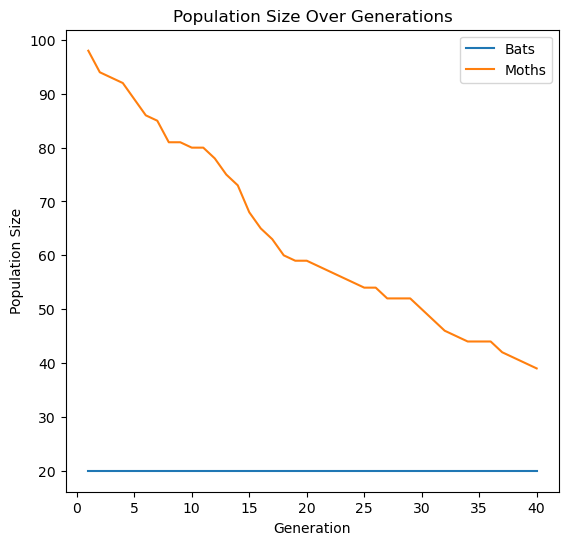

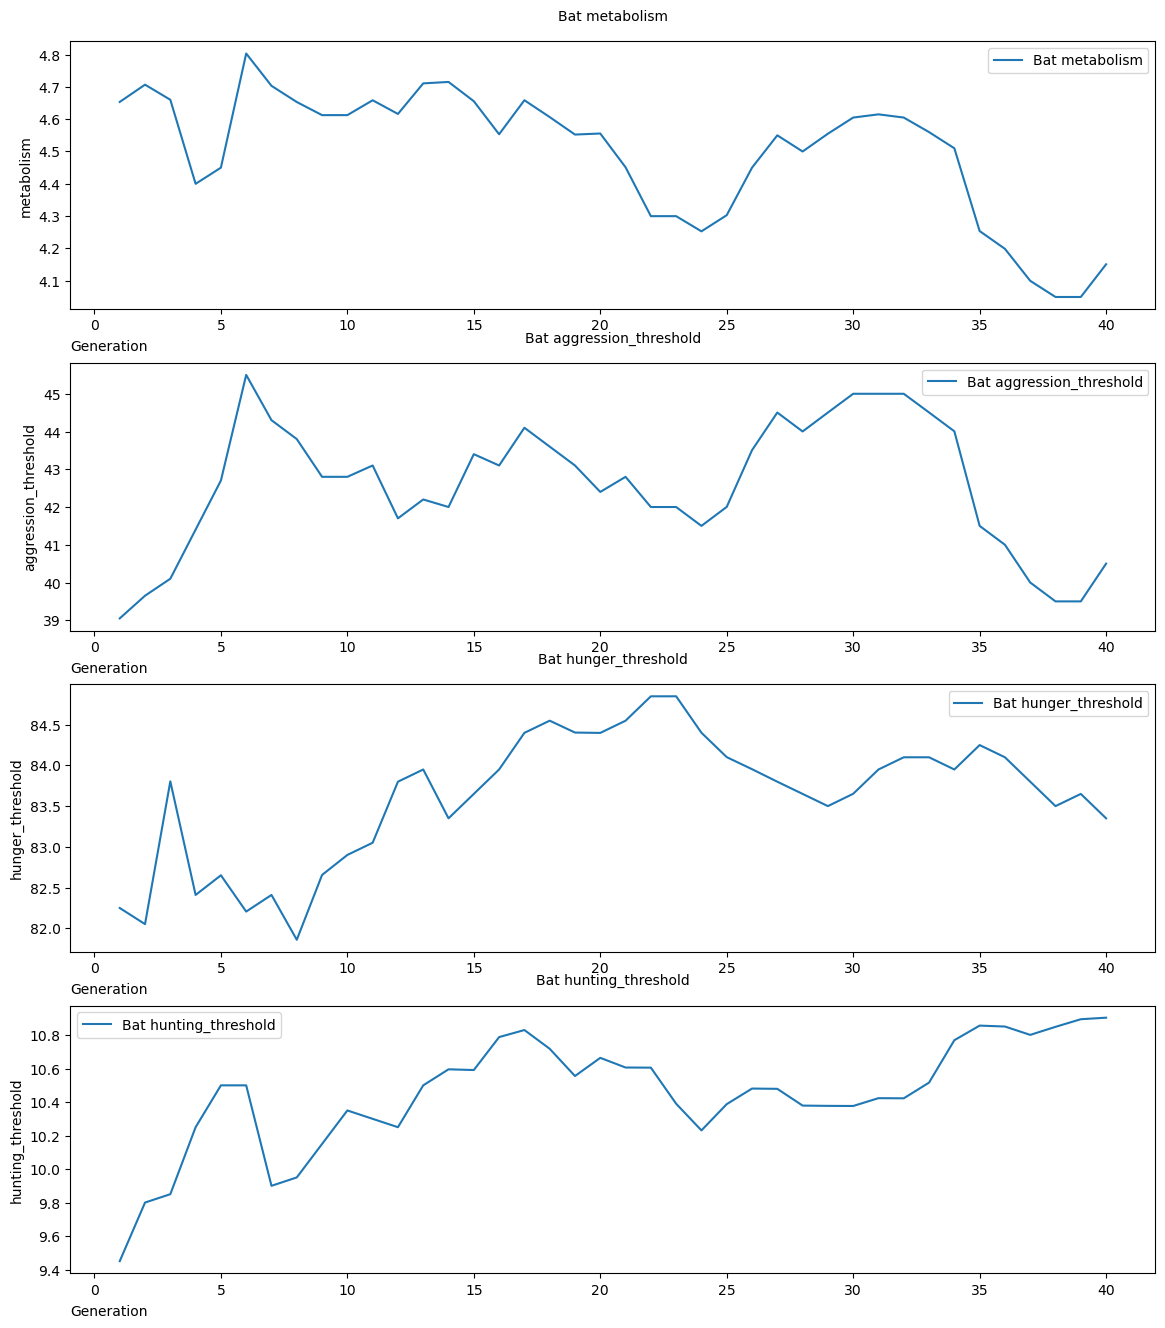

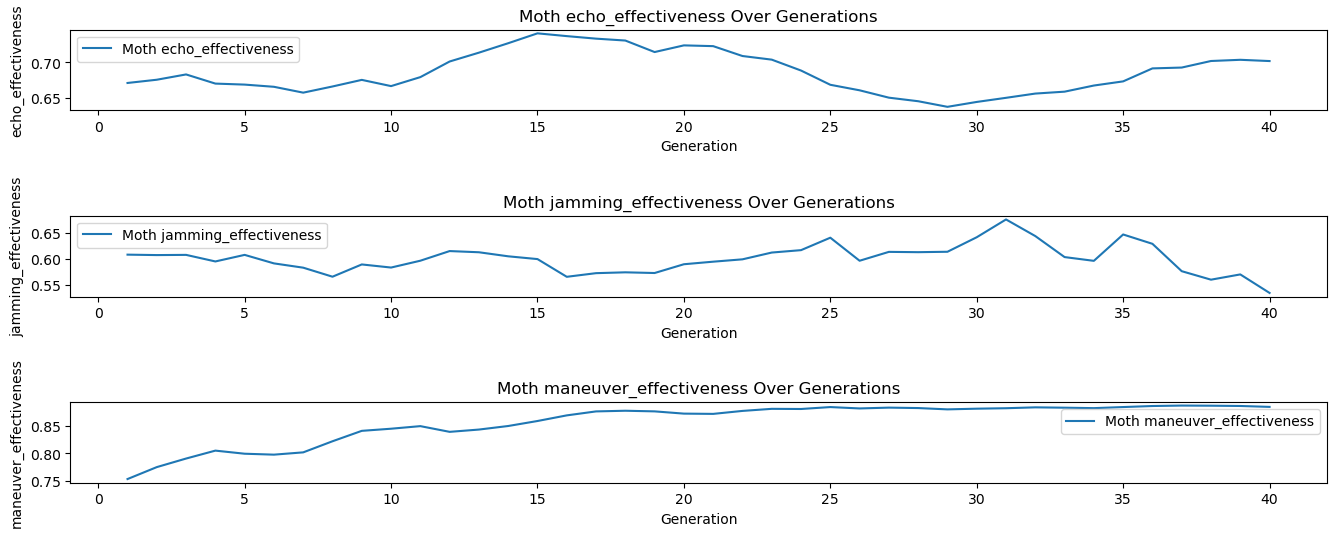

In [70]:
if __name__ == "__main__":
    ecosystem = Ecosystem(num_bats=20, num_moths=100, artificial_light=True)
    ecosystem.simulate(days=200)  # Adjust the number of days as needed
    plot_data(ecosystem.population_data, ecosystem.trait_data)


In [71]:
total_runs = 10
all_population_data = {'bats': [], 'moths': []}
all_trait_data = {}  # Will hold data in the form {'trait_name': [[values for run 1], [values for run 2], ...], ...}

for run in range(total_runs):
    ecosystem = Ecosystem(num_bats=12, num_moths=100, artificial_light=False)
    ecosystem.simulate(days=100)  
    
    # Collect population data
    for species in ['bats', 'moths']:
        if species not in all_population_data:
            all_population_data[species] = []
        all_population_data[species].append(ecosystem.population_data[species])
    
    # Collect trait data
    for trait, values in ecosystem.trait_data.items():
        if trait not in all_trait_data:
            all_trait_data[trait] = []
        all_trait_data[trait].append(values)


End of Generation 1:
Number of Bats: 12, Number of Moths: 100
Average Bat Traits: {'aggression_threshold': 40.833333333333336, 'energy': 100.0, 'hunger_threshold': 77.41666666666667, 'hunting_threshold': 10.166666666666666, 'metabolism': 4.416666666666667}
Average Moth Traits: {'echo_effectiveness': 0.7057368963126862, 'jamming_effectiveness': 0.5854508504317001, 'maneuver_effectiveness': 0.7345367992990031}
End of Generation 2:
Number of Bats: 12, Number of Moths: 99
Average Bat Traits: {'aggression_threshold': 43.0, 'energy': 100.0, 'hunger_threshold': 79.25, 'hunting_threshold': 10.25, 'metabolism': 4.5}
Average Moth Traits: {'echo_effectiveness': 0.7214098212265647, 'jamming_effectiveness': 0.5860968538647549, 'maneuver_effectiveness': 0.7509924751898888}
End of Generation 3:
Number of Bats: 12, Number of Moths: 99
Average Bat Traits: {'aggression_threshold': 41.833333333333336, 'energy': 100.0, 'hunger_threshold': 80.0, 'hunting_threshold': 10.5, 'metabolism': 4.25}
Average Moth T

In [72]:
average_population_data = {species: np.mean(values, axis=0) for species, values in all_population_data.items()}
std_population_data = {species: np.std(values, axis=0) for species, values in all_population_data.items()}

average_trait_data = {trait: np.mean(values, axis=0) for trait, values in all_trait_data.items()}
std_trait_data = {trait: np.std(values, axis=0) for trait, values in all_trait_data.items()}


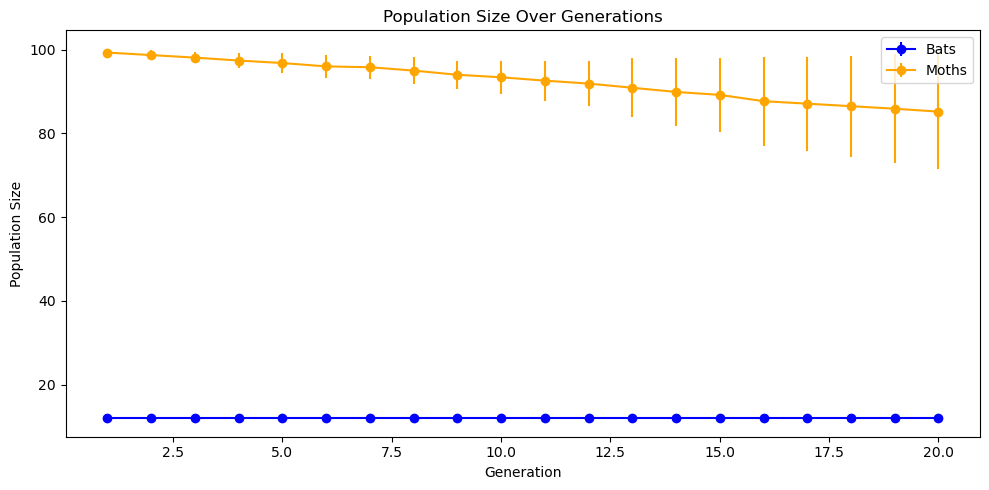

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def plot_population_with_errors(average_population_data, std_population_data):
    generations = np.arange(1, len(average_population_data['bats']) + 1)
    
    plt.figure(figsize=(10, 5))
    
    # Plot bats population
    plt.errorbar(generations, average_population_data['bats'], yerr=std_population_data['bats'], fmt='-o', label='Bats', color='blue')
    
    # Plot moths population
    plt.errorbar(generations, average_population_data['moths'], yerr=std_population_data['moths'], fmt='-o', label='Moths', color='orange')
    
    plt.title("Population Size Over Generations")
    plt.xlabel("Generation")
    plt.ylabel("Population Size")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming your average_population_data and std_population_data are structured correctly
# and populated with the means and standard deviations for population sizes
plot_population_with_errors(average_population_data, std_population_data)


Plotting Bat Traits:


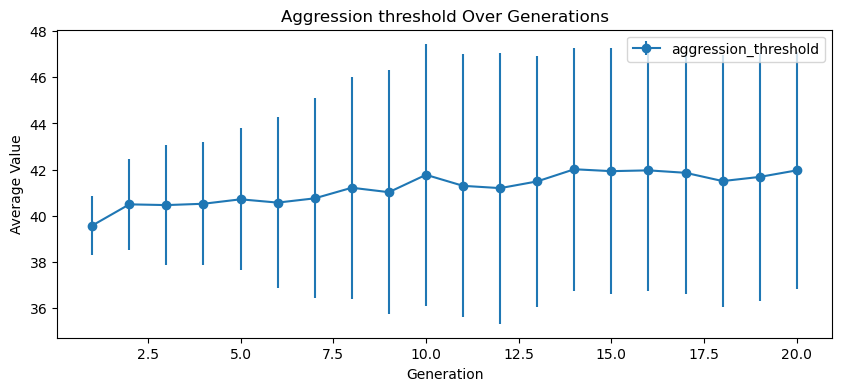

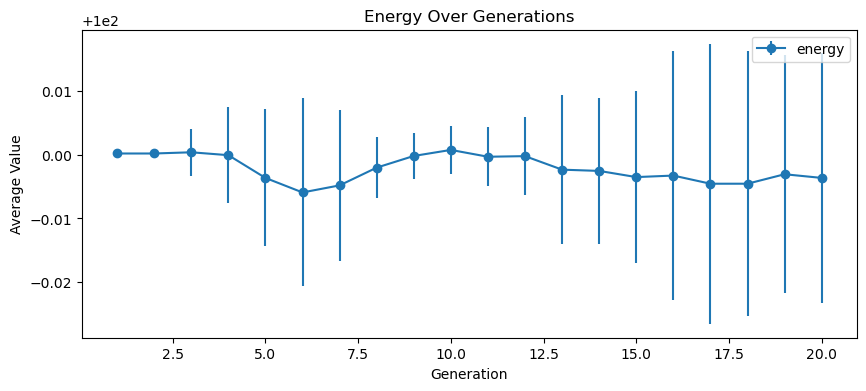

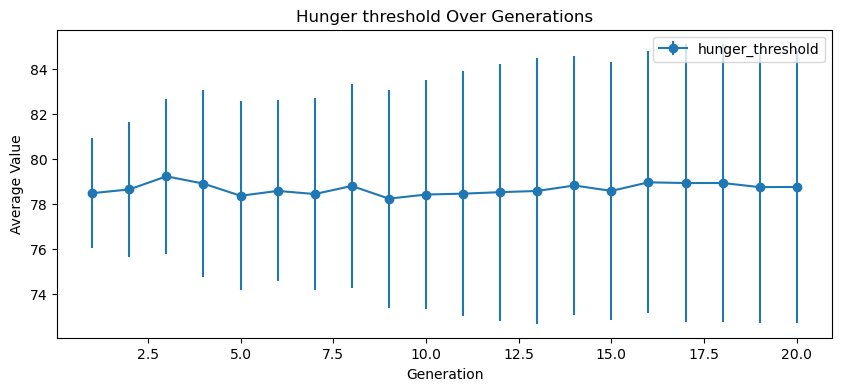

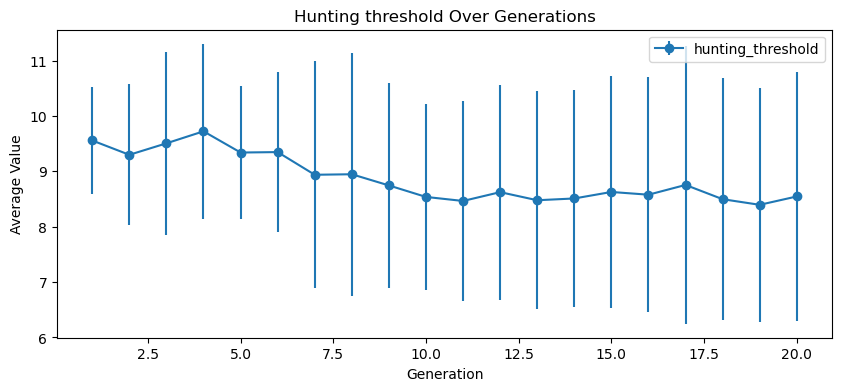

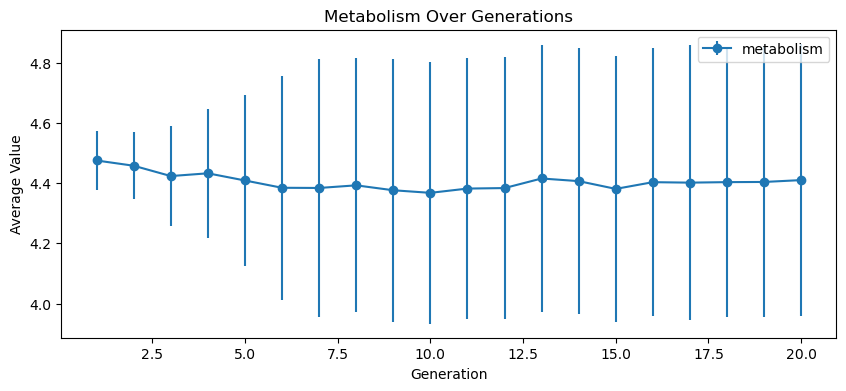

Plotting Moth Traits:


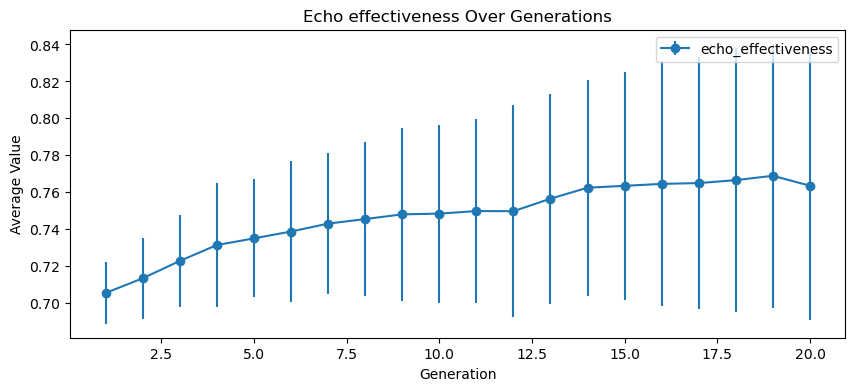

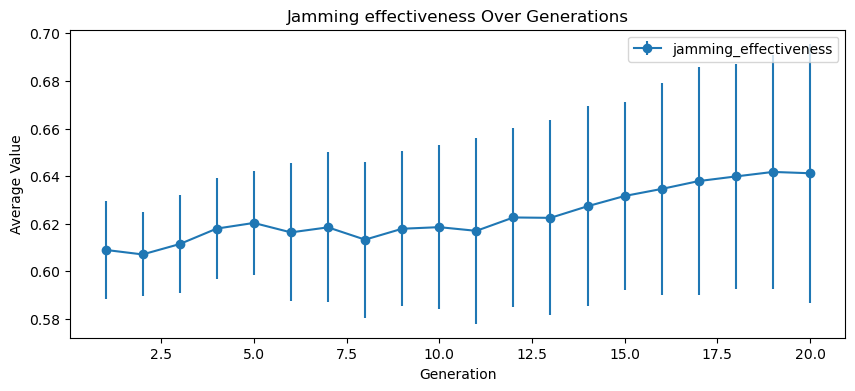

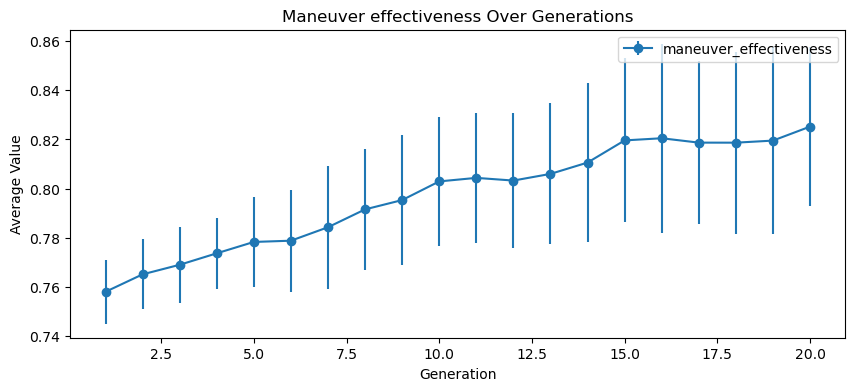

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_traits_with_errors(average_trait_data, std_trait_data, species_traits):
    for trait_key in species_traits:
        if trait_key in average_trait_data and trait_key in std_trait_data:
            generations = np.arange(1, len(average_trait_data[trait_key]) + 1)
            plt.figure(figsize=(10, 4))
            plt.errorbar(generations, average_trait_data[trait_key], yerr=std_trait_data[trait_key], fmt='-o', label=trait_key)
            plt.title(f"{trait_key.replace('_', ' ').capitalize()} Over Generations")
            plt.xlabel('Generation')
            plt.ylabel('Average Value')
            plt.legend()
            plt.show()

# Lists of specific trait keys for bats and moths based on your data structure
bat_traits = ['aggression_threshold', 'energy', 'hunger_threshold', 'hunting_threshold', 'metabolism']
moth_traits = ['echo_effectiveness', 'jamming_effectiveness', 'maneuver_effectiveness']

# Plot all bat traits
print("Plotting Bat Traits:")
plot_all_traits_with_errors(average_trait_data, std_trait_data, bat_traits)

# Plot all moth traits
print("Plotting Moth Traits:")
plot_all_traits_with_errors(average_trait_data, std_trait_data, moth_traits)


Plotting Bat Traits Side-by-Side:


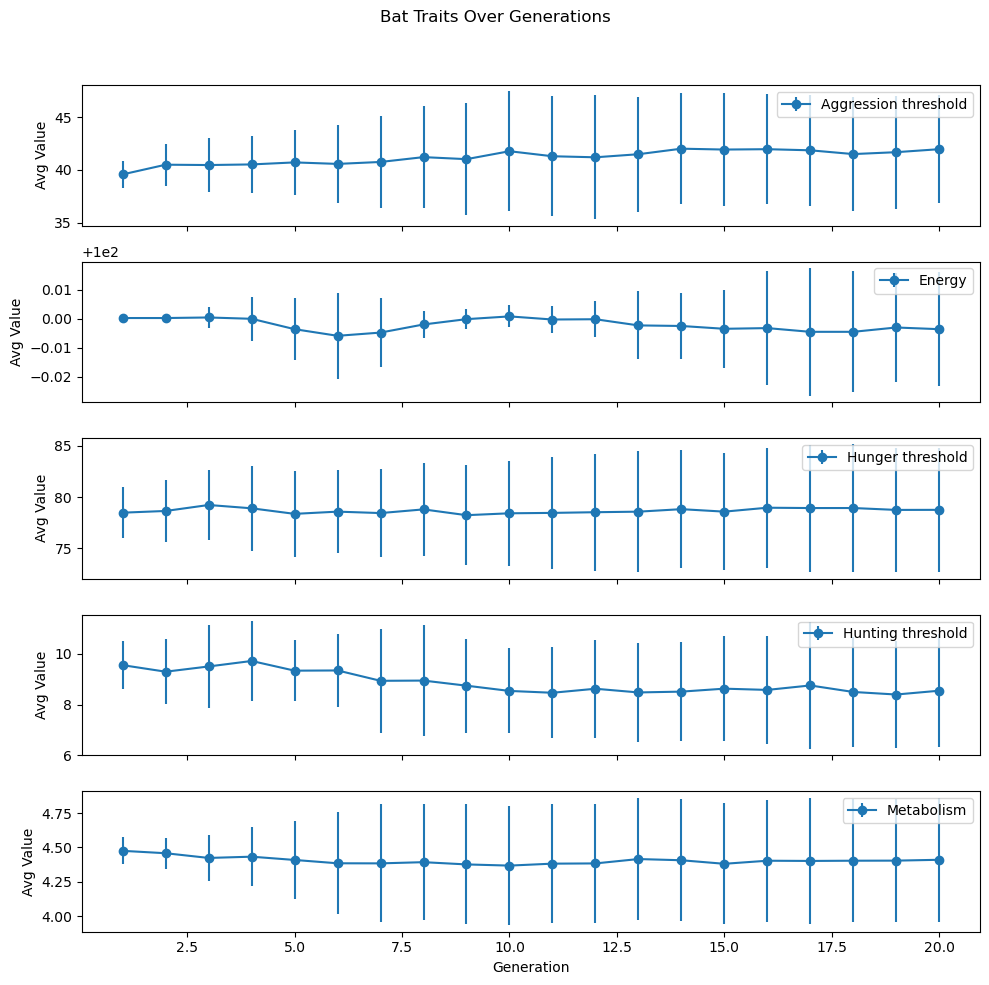

Plotting Moth Traits Side-by-Side:


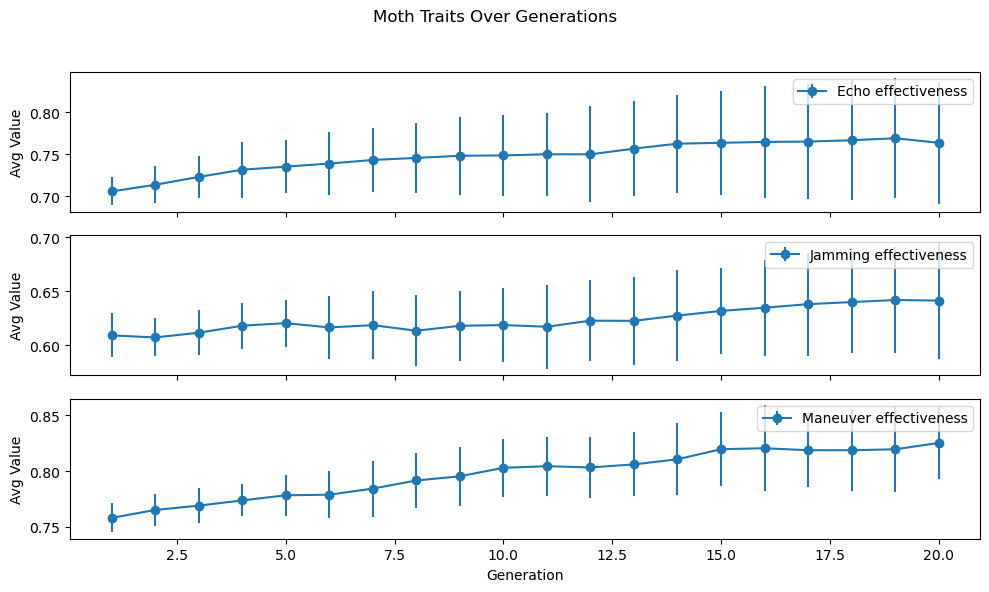

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def plot_traits_side_by_side(average_trait_data, std_trait_data, species_traits, species_name):
    # Determine the number of traits to plot
    num_traits = len(species_traits)
    
    # Create a figure with subplots arranged vertically
    fig, axs = plt.subplots(num_traits, 1, figsize=(10, 2 * num_traits), sharex=True)
    
    # Ensure axs is an array even when there's only one subplot
    if num_traits == 1:
        axs = [axs]
    
    for i, trait_key in enumerate(species_traits):
        if trait_key in average_trait_data and trait_key in std_trait_data:
            generations = np.arange(1, len(average_trait_data[trait_key]) + 1)
            axs[i].errorbar(generations, average_trait_data[trait_key], yerr=std_trait_data[trait_key], fmt='-o', label=trait_key.replace('_', ' ').capitalize())
            axs[i].set_ylabel('Avg Value')
            axs[i].legend()
    
    # Set common labels
    plt.xlabel('Generation')
    fig.suptitle(f'{species_name.capitalize()} Traits Over Generations')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the global title
    plt.show()

# Assuming average_trait_data and std_trait_data are defined as per your data
# Plot traits side-by-side for bats
print("Plotting Bat Traits Side-by-Side:")
plot_traits_side_by_side(average_trait_data, std_trait_data, bat_traits, 'Bat')

# Plot traits side-by-side for moths
print("Plotting Moth Traits Side-by-Side:")
plot_traits_side_by_side(average_trait_data, std_trait_data, moth_traits, 'Moth')
